In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

In [28]:
df_exploded = df.explode('job_skills')
skills_count= df_exploded.groupby([ 'job_title_short','job_skills']).size()

In [14]:
df_skills= skills_count.reset_index(name= 'skill_count')
df_skills= df_skills.sort_values(by='skill_count', ascending=False)
df_skills

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


<function matplotlib.pyplot.show(close=None, block=None)>

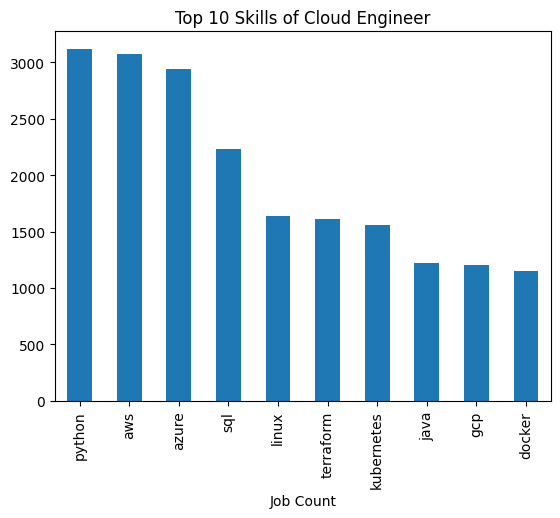

In [24]:
title = 'Cloud Engineer' 
top_skills = 10

final_skill= df_skills[df_skills['job_title_short']== title].head(top_skills)
final_skill.plot(kind= 'bar', x= 'job_skills', y= 'skill_count')
plt.title(f'Top {top_skills} Skills of {title}')
plt.xlabel('Job Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show

In [53]:
salary = df_exploded.groupby(['job_skills'])['salary_year_avg'].mean()
salary_df = salary.reset_index()
salary_df = salary_df.sort_values(by = 'salary_year_avg',ascending=False)
salary_df.head()


,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [65]:
job_skill = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
job_skill.columns=('job_title_short', 'num_unique_skills')
job_skill.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


In [1]:
print("5" * 2)

55
